<a href="https://colab.research.google.com/github/pias97/House-Price-Prediction-Using-Various-Regressor/blob/main/Ranabir_House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from scipy.stats import norm

#Machine Learning Models
import sklearn
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.impute import KNNImputer

In [ ]:
path = '/content/drive/MyDrive/Work/Quantum AI Course/Assignments/House Price Prediction/ML Coding Test Dataset.csv'

In [ ]:
df2 = pd.read_csv(path)
df1 = df2.copy()
df1.head()

,LATITUDE,LONGITUDE,CITY_NUMBER,TAX_VALUE,MUNICIPAL_TAXES,PRIMARY_ROOM_AREA,USABLE_FLOOR_SPACE,GROSS_AREA,BEDROOMS,BUILT_YEAR,ENERGY_LABEL,TOTAL_PRICE
0,58.297768,7.834061,4223.0,505 398 kr,12 885 kr,160 m²,181 m²,193 m²,3.0,1961.0,NaN,1 440 420 kr
1,58.435657,8.747802,4203.0,608 500 kr,18 030 kr,132 m²,159 m²,176 m²,3.0,1964.0,F,2 668 742 kr
2,58.246155,7.945707,4223.0,537 010 kr,NaN,140 m²,163 m²,179 m²,3.0,1970.0,NaN,2 574 142 kr
3,58.149666,7.998533,4204.0,306 175 kr,6 108 kr,32 m²,32 m²,36 m²,1.0,1961.0,E,1 496 378 kr
4,58.171501,7.985000,4204.0,822 362 kr,NaN,140 m²,144 m²,158 m²,3.0,1997.0,NaN,3 806 021 kr


In [ ]:
df1.shape

(166768, 12)

In [ ]:
df1['TAX_VALUE'] = df1.TAX_VALUE.str.replace(' kr', '')
df1['TAX_VALUE'] = df1.TAX_VALUE.str.replace('\xa0', '')
df1['TAX_VALUE'] = pd.to_numeric(df1['TAX_VALUE'], errors='ignore')

df1['MUNICIPAL_TAXES'] = df1.MUNICIPAL_TAXES.str.replace(' kr', '')
df1['MUNICIPAL_TAXES'] = df1.MUNICIPAL_TAXES.str.replace('\xa0', '')
df1['MUNICIPAL_TAXES'] = pd.to_numeric(df1['MUNICIPAL_TAXES'], errors='ignore')

df1['PRIMARY_ROOM_AREA'] = df1.PRIMARY_ROOM_AREA.str.replace(' m²', '')
df1['PRIMARY_ROOM_AREA'] = df1.PRIMARY_ROOM_AREA.str.replace('\xa0', '')
df1['PRIMARY_ROOM_AREA'] = pd.to_numeric(df1['PRIMARY_ROOM_AREA'], errors='ignore')

df1['USABLE_FLOOR_SPACE'] = df1.USABLE_FLOOR_SPACE.str.replace(' m²', '')
df1['USABLE_FLOOR_SPACE'] = df1.USABLE_FLOOR_SPACE.str.replace('\xa0', '')
df1['USABLE_FLOOR_SPACE'] = pd.to_numeric(df1['USABLE_FLOOR_SPACE'], errors='ignore')

df1['GROSS_AREA'] = df1.GROSS_AREA.str.replace(' m²', '')
df1['GROSS_AREA'] = df1.GROSS_AREA.str.replace('\xa0', '')
df1['GROSS_AREA'] = pd.to_numeric(df1['GROSS_AREA'], errors='ignore')

df1['TOTAL_PRICE'] = df1.TOTAL_PRICE.str.replace(' kr', '')
df1['TOTAL_PRICE'] = df1.TOTAL_PRICE.str.replace('\xa0', '')
df1['TOTAL_PRICE'] = pd.to_numeric(df1['TOTAL_PRICE'], errors='ignore')

#df1['ENERGY_LABEL'].replace(to_replace=['A', 'B', 'C','D', 'E', 'F', 'G'], value=[1, 2, 3,4,5,6,7], inplace=True)


In [ ]:
df1.head()

,LATITUDE,LONGITUDE,CITY_NUMBER,TAX_VALUE,MUNICIPAL_TAXES,PRIMARY_ROOM_AREA,USABLE_FLOOR_SPACE,GROSS_AREA,BEDROOMS,BUILT_YEAR,ENERGY_LABEL,TOTAL_PRICE
0,58.297768,7.834061,4223.0,505398.0,12885.0,160.0,181.0,193.0,3.0,1961.0,NaN,1440420
1,58.435657,8.747802,4203.0,608500.0,18030.0,132.0,159.0,176.0,3.0,1964.0,F,2668742
2,58.246155,7.945707,4223.0,537010.0,NaN,140.0,163.0,179.0,3.0,1970.0,NaN,2574142
3,58.149666,7.998533,4204.0,306175.0,6108.0,32.0,32.0,36.0,1.0,1961.0,E,1496378
4,58.171501,7.985000,4204.0,822362.0,NaN,140.0,144.0,158.0,3.0,1997.0,NaN,3806021


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166768 entries, 0 to 166767
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   LATITUDE            166768 non-null  float64
 1   LONGITUDE           166768 non-null  float64
 2   CITY_NUMBER         166624 non-null  float64
 3   TAX_VALUE           136381 non-null  float64
 4   MUNICIPAL_TAXES     93184 non-null   float64
 5   PRIMARY_ROOM_AREA   165095 non-null  float64
 6   USABLE_FLOOR_SPACE  165499 non-null  float64
 7   GROSS_AREA          117358 non-null  float64
 8   BEDROOMS            160814 non-null  float64
 9   BUILT_YEAR          164584 non-null  float64
 10  ENERGY_LABEL        127615 non-null  object 
 11  TOTAL_PRICE         166768 non-null  int64  
dtypes: float64(10), int64(1), object(1)
memory usage: 15.3+ MB


In [ ]:
df1.describe()

,LATITUDE,LONGITUDE,CITY_NUMBER,TAX_VALUE,MUNICIPAL_TAXES,PRIMARY_ROOM_AREA,USABLE_FLOOR_SPACE,GROSS_AREA,BEDROOMS,BUILT_YEAR,TOTAL_PRICE
count,166768.000000,166768.000000,166624.000000,1.363810e+05,93184.000000,165095.000000,165499.000000,117358.000000,160814.000000,164584.000000,1.667680e+05
mean,61.630107,10.176236,3021.201982,8.160642e+05,13089.871695,113.262918,130.674022,144.068624,2.774081,1977.007230,3.821578e+06
std,3.684552,4.387788,1694.339204,1.902400e+06,9213.134761,68.303253,92.857686,100.161577,1.473997,37.296304,3.238544e+06
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,1600.000000,1.000000e+00
25%,59.402578,6.913600,1507.000000,4.827710e+05,8530.000000,67.000000,70.000000,76.000000,2.000000,1956.000000,2.205092e+06
50%,60.201401,10.369204,3405.000000,6.812420e+05,12025.500000,95.000000,104.000000,115.000000,3.000000,1980.000000,3.167250e+06
75%,63.117500,11.007900,4601.000000,9.482580e+05,16229.000000,145.000000,171.000000,190.000000,3.000000,2009.000000,4.501288e+06
max,78.221336,31.118286,9911.000000,1.234568e+08,946024.000000,3912.000000,5152.000000,3000.000000,32.000000,2021.000000,1.281406e+08


In [ ]:
df1.isnull().sum()

LATITUDE                  0
LONGITUDE                 0
CITY_NUMBER             144
TAX_VALUE             30387
MUNICIPAL_TAXES       73584
PRIMARY_ROOM_AREA      1673
USABLE_FLOOR_SPACE     1269
GROSS_AREA            49410
BEDROOMS               5954
BUILT_YEAR             2184
ENERGY_LABEL          39153
TOTAL_PRICE               0
dtype: int64

In [ ]:
df1.dropna(how='any', subset=['CITY_NUMBER','PRIMARY_ROOM_AREA','USABLE_FLOOR_SPACE','BUILT_YEAR','BEDROOMS'], inplace=True)
df1.isnull().sum()

LATITUDE                  0
LONGITUDE                 0
CITY_NUMBER               0
TAX_VALUE             26843
MUNICIPAL_TAXES       68707
PRIMARY_ROOM_AREA         0
USABLE_FLOOR_SPACE        0
GROSS_AREA            45786
BEDROOMS                  0
BUILT_YEAR                0
ENERGY_LABEL          34979
TOTAL_PRICE               0
dtype: int64

In [ ]:
df1['TOTAL_PRICE'] = df1['TOTAL_PRICE'].astype('int64')
df1['CITY_NUMBER'] = df1['CITY_NUMBER'].astype('int64')
df1['BEDROOMS'] = df1['BEDROOMS'].astype('int64')

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157711 entries, 0 to 166767
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   LATITUDE            157711 non-null  float64
 1   LONGITUDE           157711 non-null  float64
 2   CITY_NUMBER         157711 non-null  int64  
 3   TAX_VALUE           130868 non-null  float64
 4   MUNICIPAL_TAXES     89004 non-null   float64
 5   PRIMARY_ROOM_AREA   157711 non-null  float64
 6   USABLE_FLOOR_SPACE  157711 non-null  float64
 7   GROSS_AREA          111925 non-null  float64
 8   BEDROOMS            157711 non-null  int64  
 9   BUILT_YEAR          157711 non-null  float64
 10  ENERGY_LABEL        122732 non-null  object 
 11  TOTAL_PRICE         157711 non-null  int64  
dtypes: float64(8), int64(3), object(1)
memory usage: 15.6+ MB


In [ ]:
df1.head()

,LATITUDE,LONGITUDE,CITY_NUMBER,TAX_VALUE,MUNICIPAL_TAXES,PRIMARY_ROOM_AREA,USABLE_FLOOR_SPACE,GROSS_AREA,BEDROOMS,BUILT_YEAR,ENERGY_LABEL,TOTAL_PRICE
0,58.297768,7.834061,4223,505398.0,12885.0,160.0,181.0,193.0,3,1961.0,NaN,1440420
1,58.435657,8.747802,4203,608500.0,18030.0,132.0,159.0,176.0,3,1964.0,F,2668742
2,58.246155,7.945707,4223,537010.0,NaN,140.0,163.0,179.0,3,1970.0,NaN,2574142
3,58.149666,7.998533,4204,306175.0,6108.0,32.0,32.0,36.0,1,1961.0,E,1496378
4,58.171501,7.985000,4204,822362.0,NaN,140.0,144.0,158.0,3,1997.0,NaN,3806021


#Diagram Analysis

In [ ]:
df1['ENERGY_LABEL'].value_counts()

G    37168
F    21832
D    18870
C    18202
E    17539
B    12779
A     1225
Name: ENERGY_LABEL, dtype: int64

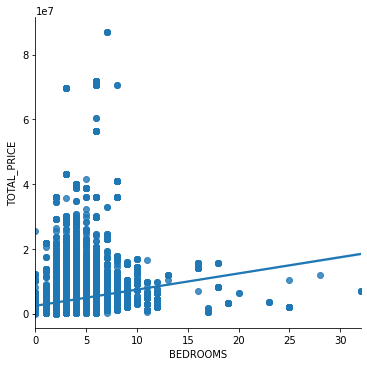

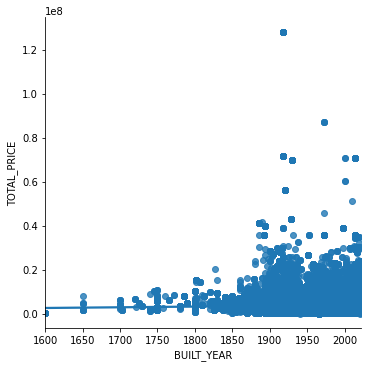

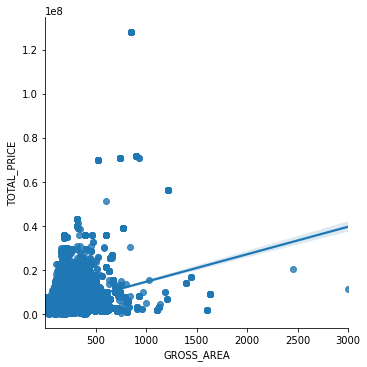

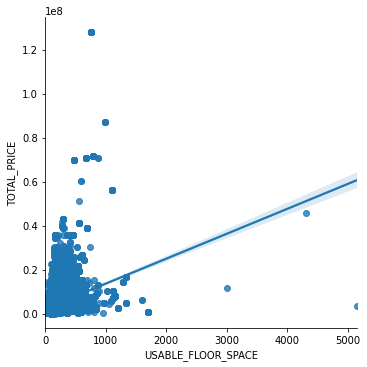

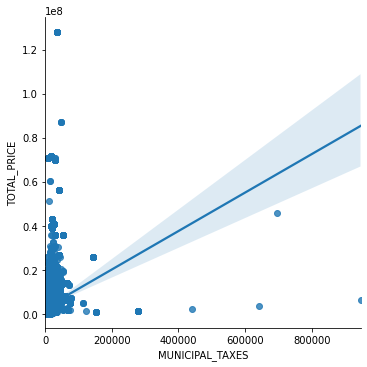

In [ ]:
neumaric=['BEDROOMS','BUILT_YEAR','GROSS_AREA','USABLE_FLOOR_SPACE','MUNICIPAL_TAXES']
for i in neumaric:
    sns.lmplot(x = i, y ='TOTAL_PRICE', data = df1)



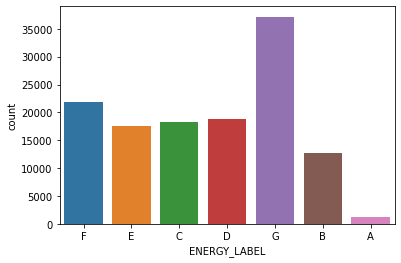

In [ ]:
plt.figure()
sns.countplot(x='ENERGY_LABEL', data=df1)

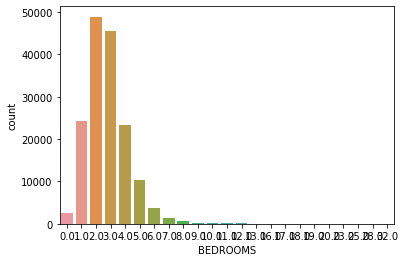

In [ ]:
plt.figure()
sns.countplot(x='BEDROOMS', data=df1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


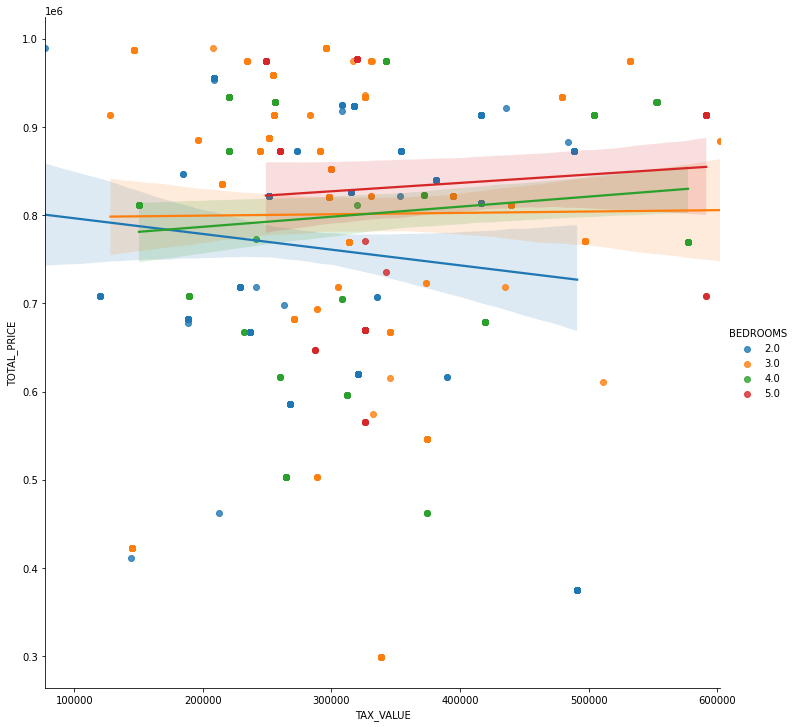

In [ ]:
sns.lmplot("TAX_VALUE","TOTAL_PRICE",df1[(df1["BEDROOMS"]<=5) & 
                                         (df1["BEDROOMS"]> 1) & 
                                        (df1["TOTAL_PRICE"]< 1000000)
                                       ].dropna(),hue="BEDROOMS", size=10)

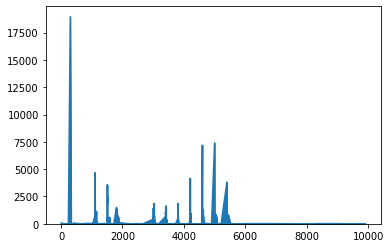

In [ ]:
#Plot Price
df1['CITY_NUMBER'].value_counts().sort_index().plot.area()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


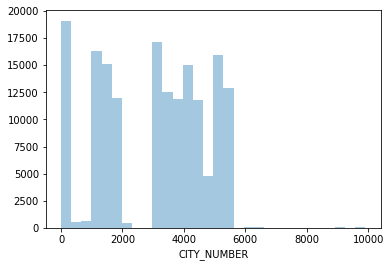

In [ ]:
ax = sns.distplot(df1['CITY_NUMBER'], bins = 30, kde = False)

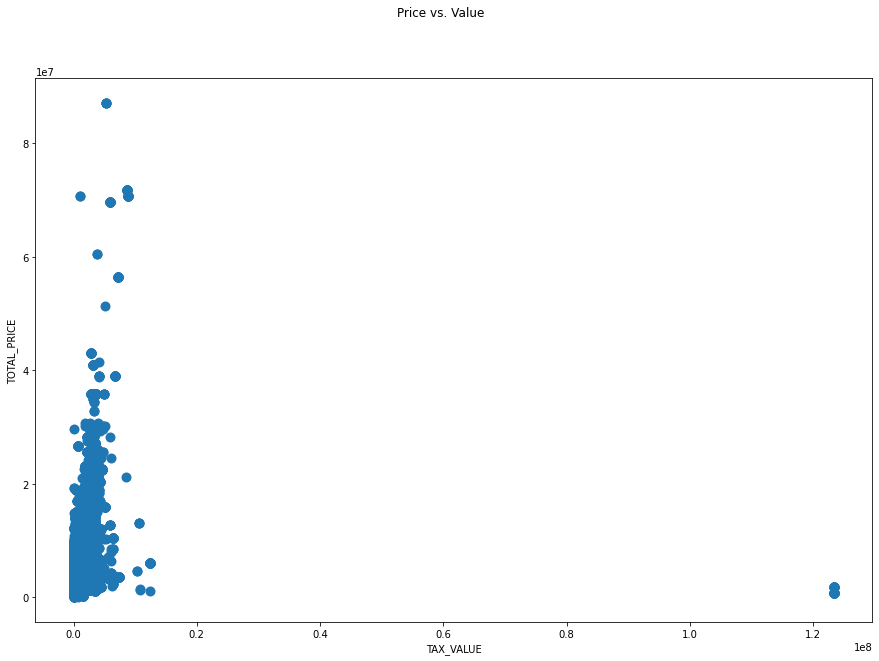

In [ ]:
plt.figure(figsize=(15,10))
plt.xlabel('TAX_VALUE')
plt.suptitle('Price vs. Value')
plt.ylabel('TOTAL_PRICE')
plt.scatter(df1.TAX_VALUE, df1.TOTAL_PRICE , s = 100, linewidth=0)

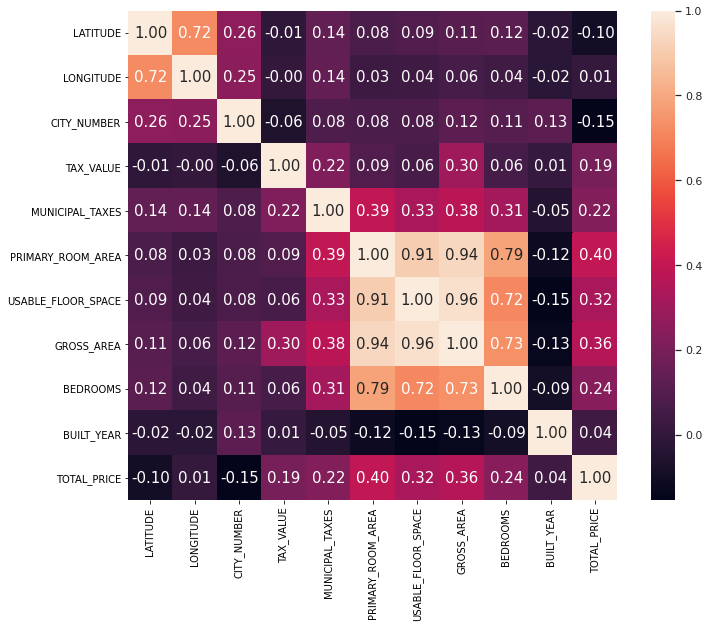

In [ ]:
corrmat = df1.corr()
f, ax = plt.subplots(figsize=(12, 9))
# sns.heatmap(corrmat, vmax=.8, square=True);

# cm = np.corrcoef(df1.values.T)
sns.set(font_scale=1)
hm = sns.heatmap(corrmat, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15})
plt.show()

#Data Preprocessing

In [ ]:
#instantiate both packages to use
encoder = OrdinalEncoder()
imputer = KNNImputer(n_neighbors=2)

In [ ]:
df1.head()

,LATITUDE,LONGITUDE,CITY_NUMBER,TAX_VALUE,MUNICIPAL_TAXES,PRIMARY_ROOM_AREA,USABLE_FLOOR_SPACE,GROSS_AREA,BEDROOMS,BUILT_YEAR,ENERGY_LABEL,TOTAL_PRICE
0,58.297768,7.834061,4223,505398.0,12885.0,160.0,181.0,193.0,3,1961.0,NaN,1440420
1,58.435657,8.747802,4203,608500.0,18030.0,132.0,159.0,176.0,3,1964.0,F,2668742
2,58.246155,7.945707,4223,537010.0,NaN,140.0,163.0,179.0,3,1970.0,NaN,2574142
3,58.149666,7.998533,4204,306175.0,6108.0,32.0,32.0,36.0,1,1961.0,E,1496378
4,58.171501,7.985000,4204,822362.0,NaN,140.0,144.0,158.0,3,1997.0,NaN,3806021


In [ ]:
cat_variables = df1[['ENERGY_LABEL']]
cat_dummies = pd.get_dummies(cat_variables)
cat_dummies.head()



,ENERGY_LABEL_A,ENERGY_LABEL_B,ENERGY_LABEL_C,ENERGY_LABEL_D,ENERGY_LABEL_E,ENERGY_LABEL_F,ENERGY_LABEL_G
0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0


In [ ]:
df1 = df1.drop(['ENERGY_LABEL'], axis=1)
df1 = pd.concat([df1, cat_dummies], axis=1)


In [ ]:
df1.head(20)
#df1.shape

In [ ]:
df1_fill_pd = pd.DataFrame(df1_fill)

df1_fill_pd.rename(columns={0:'LATITUDE',
                     1:'LONGITUDE',
                     2:'CITY_NUMBER',
                     3:'TAX_VALUE',
                     4:'MUNICIPAL_TAXES',
                     5:'PRIMARY_ROOM_AREA',
                     6:'USABLE_FLOOR_SPACE',
                     7:'GROSS_AREA',
                     8:'BEDROOMS',
                     9:'BUILT_YEAR',
                     10:'TOTAL_PRICE',
                     11:'ENERGY_LABEL_A',
                     12:'ENERGY_LABEL_B',
                     13:'ENERGY_LABEL_C',
                     14:'ENERGY_LABEL_D',
                     15:'ENERGY_LABEL_E',
                     16:'ENERGY_LABEL_F',
                     17:'ENERGY_LABEL_G'},
            inplace=True)
df1_fill_pd

#KNN imputation on whole dataset

In [ ]:
df1_fill = imputer.fit_transform(df1)

In [ ]:
df1_fill_pd = pd.DataFrame(df1_fill)

df1_fill_pd.rename(columns={0:'LATITUDE',
                     1:'LONGITUDE',
                     2:'CITY_NUMBER',
                     3:'TAX_VALUE',
                     4:'MUNICIPAL_TAXES',
                     5:'PRIMARY_ROOM_AREA',
                     6:'USABLE_FLOOR_SPACE',
                     7:'GROSS_AREA',
                     8:'BEDROOMS',
                     9:'BUILT_YEAR',
                     10:'TOTAL_PRICE',
                     11:'ENERGY_LABEL_A',
                     12:'ENERGY_LABEL_B',
                     13:'ENERGY_LABEL_C',
                     14:'ENERGY_LABEL_D',
                     15:'ENERGY_LABEL_E',
                     16:'ENERGY_LABEL_F',
                     17:'ENERGY_LABEL_G'},
            inplace=True)
df1_fill_pd

In [ ]:
df1_fill_pd.isnull().sum()

LATITUDE              0
LONGITUDE             0
CITY_NUMBER           0
TAX_VALUE             0
MUNICIPAL_TAXES       0
PRIMARY_ROOM_AREA     0
USABLE_FLOOR_SPACE    0
GROSS_AREA            0
BEDROOMS              0
BUILT_YEAR            0
TOTAL_PRICE           0
ENERGY_LABEL_A        0
ENERGY_LABEL_B        0
ENERGY_LABEL_C        0
ENERGY_LABEL_D        0
ENERGY_LABEL_E        0
ENERGY_LABEL_F        0
ENERGY_LABEL_G        0
dtype: int64

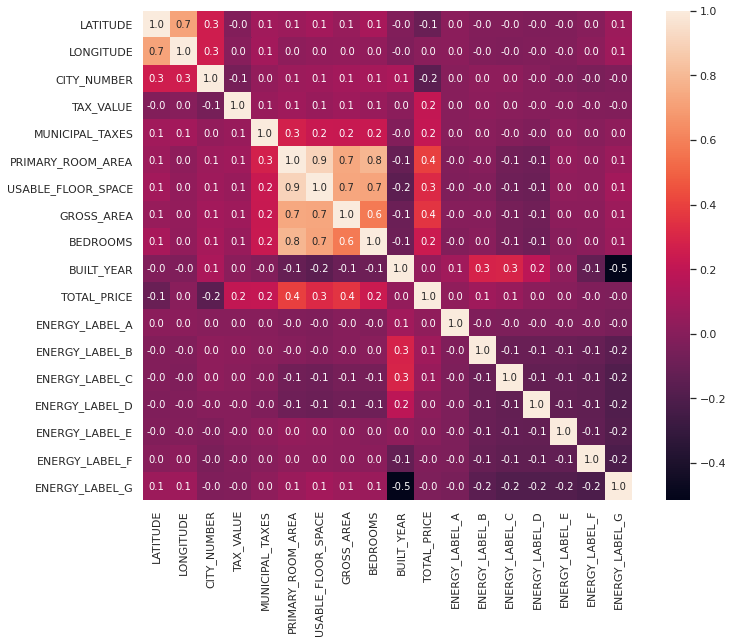

In [ ]:
corrmat = df1_fill_pd.corr()
f, ax = plt.subplots(figsize=(12, 9))
# sns.heatmap(corrmat, vmax=.8, square=True);

# cm = np.corrcoef(df1.values.T)
sns.set(font_scale=1)
hm = sns.heatmap(corrmat, cbar=True, annot=True, square=True, fmt='.1f', annot_kws={'size': 10})
plt.show()

#Model Buildig

In [ ]:
df1_fill_pd.to_csv('House_Price_Prediction_Whole_Cleaned_BY_KNN.csv', index=False,header=True)

In [ ]:
path1 = '/content/drive/MyDrive/Work/Quantum AI Course/Assignments/House Price Prediction/House_Price_Prediction_Whole_Cleaned_BY_KNN(Encoded).csv'

In [ ]:
df2 = pd.read_csv(path1)
df1 = df2.copy()
df1.head()

In [ ]:
X=df1[['CITY_NUMBER', 'TAX_VALUE', 'MUNICIPAL_TAXES','PRIMARY_ROOM_AREA','USABLE_FLOOR_SPACE','GROSS_AREA','BEDROOMS','BUILT_YEAR', 'ENERGY_LABEL_A','ENERGY_LABEL_B','ENERGY_LABEL_C','ENERGY_LABEL_D','ENERGY_LABEL_E','ENERGY_LABEL_F','ENERGY_LABEL_G']]
Y=df1[[ 'TOTAL_PRICE']]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, train_size=0.9, random_state=42)


In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(141939, 15)
(141939, 1)
(15772, 15)


#Linear Regression

In [ ]:
regressor = LinearRegression()

# Fit model to training data
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
regressor.score(X_test,y_test)

0.30157702083927684

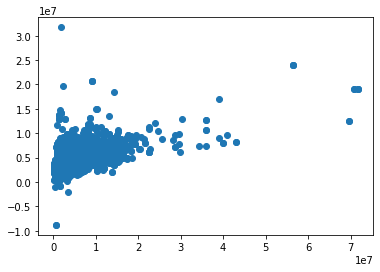

In [ ]:
plt.scatter(y_test, y_pred)

In [ ]:
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 1516933.7190646823
MSE: 6729516390214.582
RMSE: 2594131.1436036886


#Decision Tree Regressor

In [ ]:
tree = DecisionTreeRegressor()
tree.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
y_pred_DT = tree.predict(X_test)

In [ ]:
tree.score(X_test,y_test)

0.9597622802234412

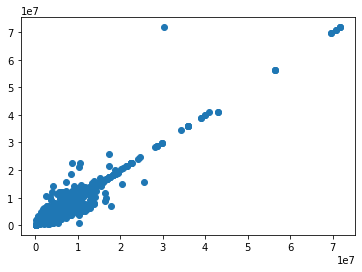

In [ ]:
plt.scatter(y_test, y_pred_DT)

In [ ]:
print('MAE:',metrics.mean_absolute_error(y_test,y_pred_DT))
print('MSE:',metrics.mean_squared_error(y_test,y_pred_DT))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred_DT)))

MAE: 108821.14537391119
MSE: 387702585425.52905
RMSE: 622657.6791669151
